In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### Bayes Theorem
- Consider a spanner:
<img src="Images/9_1_spanner.JPG" height="300">
- Assume that we works in a factory, with 2 machines to produce spanner, each machine produces the same type of spanner but different amounts. Each of the spanner will be labeled based on the machine number that produces it:
<img src="Images/9_2_factory.JPG" height="450">
- At the end of the day, they are put together, and we have to take out the defected spanner:
<img src="Images/9_3_defects.JPG" height="300" width="200">
- The problem is: What is the probability of machine 2 produces a defective spanner? (the defective spanner has label m2)
#### Bayes Formular
$$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$
- First, we have: 
    - Machine 1: 30 spanners/hr
    - Machine 2: 20 spanners/hr
- Out of all produced parts:
    - There are 1% of defective spanners
- Out of all **defective** parts:
    - There are 50% from machine 1, 50% from machine 2
- So we have:
    - P(mach_1) = 30/50 = 0.6
    - P(mach_2) = 20/50 = 0.4
    - P(defect) = 1%
    - P(mach_1|defect) = 50%
    - P(mach_2|defect) = 50%
- Using Bayes:
$$P(defect|mach_2) = \frac{P(mach_2|defect)*P(defect)}{P(mach_2)}$$

### Naive Bayes Classifier
- How to apply Bayes theorem to make an algorithm for machine learning?
<img src="Images/9_4_problem.JPG" height="300">
- **Plan of Attack**: 
    - Step 1: what is the probability that the New person (new data point) will walk
    - Note that X is a vector of features of the person (Age, Salary) or X = (X1, X2):
   <img src="Images/9_5_Interpretation.JPG" height="300"> 
   - Step 2: the same, but the person will drive
   - Step 3: compare between those 2.
- How to perform those steps?
    - Calculate P(Walks):
    $$P(Walks) = \frac{No.of.walkers}{total.obs} = \frac{10}{30}$$
    - Calculate the Prior P(X): Draw a circle around X with a certain radius. So all the datapoints inside the circle can be considered as having the same Features with X. P(X) tells us what is the likelihood of any new random variable that we add to the dataset falling inside that circle.
    $$P(X)=\frac{No.of.similar.obs}{total.obs}=4/30$$
    <img src="Images/9_6_P(X).JPG" height="300"> 
    - Calculate Likelihood P(X|Walks): what is the likelihood of people who walk having the same characteristics as X? As in the figure above, we see that there are 3 Walks in the circle, so:
    $$P(X|Walks) = \frac{red.in.circle}{total.red} = \frac{3}{10}$$
    - So P(Walks|X) = 0.75 using Bayes.
    - Similarly, we calculate P(Drive|X) = 0.25.
    - So we decide that X belongs to Walk category.

### Naive Bayes Extras
1. Why it is called "Naive"?
    - Bayes theorem requires **Independence Assumption**, it means that in practice, it's not correct, but we assume that those variables are independent, we are "naive". As in the example, Salary and Age must be independent. But in the example, we see that there are some correlations between Age and Salary because the scatter plot shows that the older the person, the more he/she earns.

2. Understanding P(X):
    - We assume that all the datapoints lie within the circle (the new point X added is the center) will have the same features as X.
    - Another way to understand: What if we throw a random datapoint into the dataset? What is the likelihood that it will fall into the circle? Note that to calculate Bayes for Walks and Drives, we can eliminate P(X) in the denominator. So we can compare only the nominator => Maximum Likelihood

3. What happens if we have more than 2 classes?
    - So compare the posteriori of all of those classes, and decide the one with largest (Maximum a Posteriori (MAP))

### Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [6]:
# Split into training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [7]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
# Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [10]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [11]:
y_pred = classifier.predict(X_test)

In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[54,  4],
       [ 1, 21]])

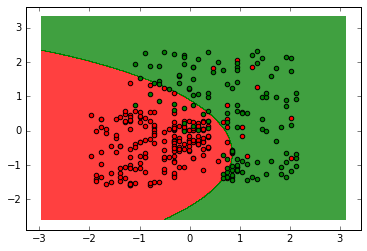

In [17]:
# Visualization
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 = X_set[:, 0]
X2 = X_set[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
            cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i),
               label=j)

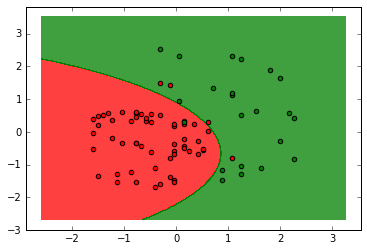

In [18]:
# Visualization
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 = X_set[:, 0]
X2 = X_set[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
            cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i),
               label=j)